## QUESTION ::
Consider the given heart disease dataset with 12 attributes for different patients along with a target variable. The target attribute refers to the probability of occurrence of heart disease on a scale of 0 to 4.
1. Show the summary of the dataset (data distribution, class distribution)

2. Identify continuous and categorical attributes.

3. Perform required preprocessing 

4. Using k-fold cross-validation (choose the value of k to be (lastDigitOfRollNumber % 4) + 5), compare the classification performance by computing average accuracy obtained using  the following classifiers:\
    4.1 Decision Tree Classifier\
    4.2 Naive Bayes Classifier\
    4.3 K-Nearest Neighbor classifier (choose the value of k to be (lastDigitOfRollNumber % 5) + 5 )

In [76]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DataSets/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [78]:
read_data = pd.read_csv('HeartDiseaseFinal.csv')
read_data.head()

,age,sex,Chest Pain Type,Resting Blood Pressure,Cholestrol,Fasting Blood Sugar,Resting Electrocardiographic Resylt,Max Heart Rate,Exercise Induced Angina,ST depression,Slope of peak exercise,Number of major vessels,target
0,63,Male,Typical Angina,145,233,1,2,150,0,2.3,3,0,0
1,67,Male,Asymptotic,160,286,0,2,108,1,1.5,2,3,2
2,67,Male,Asymptotic,120,229,0,2,129,1,2.6,2,2,1
3,37,Male,Non-anginal Pain,130,250,0,0,187,0,3.5,3,0,0
4,41,Female,Atypical Angina,130,204,0,2,172,0,1.4,1,0,0


# 1.)

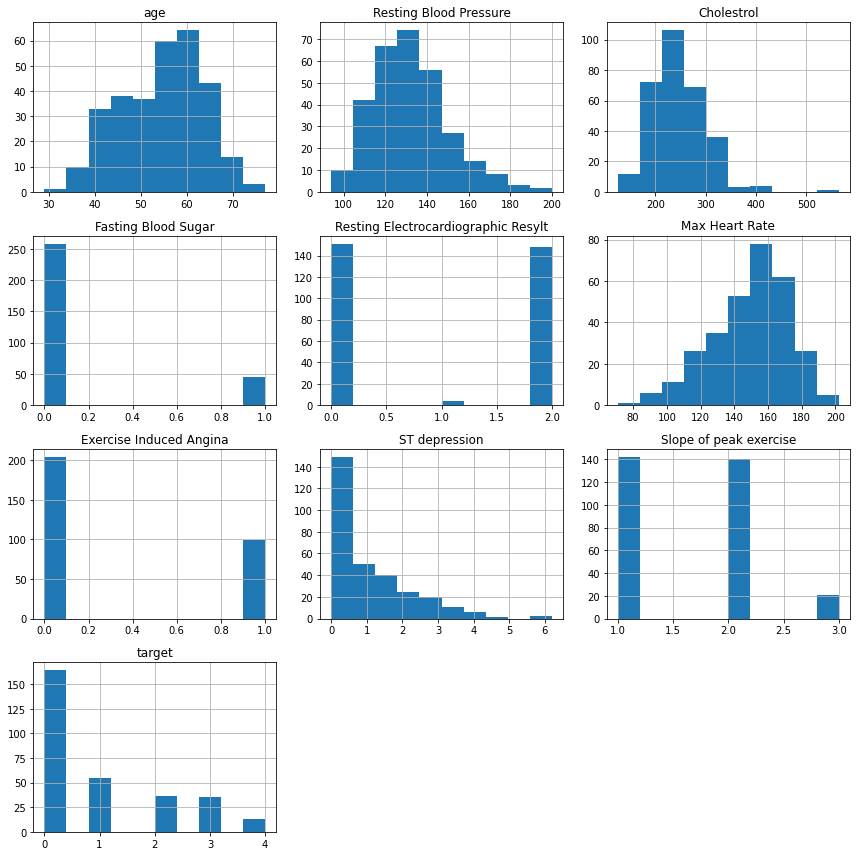

In [79]:
read_data.hist(column=read_data.columns, figsize=(12,12));

plt.tight_layout();

In [80]:
read_data.describe()

,age,Resting Blood Pressure,Cholestrol,Fasting Blood Sugar,Resting Electrocardiographic Resylt,Max Heart Rate,Exercise Induced Angina,ST depression,Slope of peak exercise,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# 2.)

In [81]:
read_data.dtypes

age                                      int64
sex                                     object
Chest Pain Type                         object
Resting Blood Pressure                   int64
Cholestrol                               int64
Fasting Blood Sugar                      int64
Resting Electrocardiographic Resylt      int64
Max Heart Rate                           int64
Exercise Induced Angina                  int64
ST depression                          float64
Slope of peak exercise                   int64
Number of major vessels                 object
target                                   int64
dtype: object

The attributes with object dtype are categorical attributes.
And attributes with int64 or float64 dtypes are continuous attributes.

# 3.)

In [82]:
read_data = pd.get_dummies(read_data, columns = ['sex', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiographic Resylt', 'Exercise Induced Angina', 'Slope of peak exercise', 'Number of major vessels'])

In [83]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'Resting Blood Pressure', 'Cholestrol', 'Max Heart Rate', 'ST depression']
read_data[columns_to_scale] = standardScaler.fit_transform(read_data[columns_to_scale])

# 4.)

In [84]:
y = read_data['target']
X = read_data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

### Decision Tree Classifier

In [85]:
k = (9 % 4) + 5
scores = cross_val_score(DecisionTreeClassifier(),read_data,y,cv=k)
print(scores,'\n')
print(scores.mean())

[1. 1. 1. 1. 1. 1.] 

1.0


### Naive Bayes Classifier

In [86]:
scores = cross_val_score( GaussianNB(),read_data,y,cv=k)
print(scores,'\n')
print(scores.mean())

[1.         1.         0.98039216 1.         1.         1.        ] 

0.9967320261437909


### K Neighbors Classifier

In [87]:
k = (9 % 5) + 5
kn_classifier = KNeighborsClassifier(n_neighbors = k)
kn_classifier.fit(X_train, y_train)
kn_classifier.score(X_test, y_test)

0.57

K-Fold

In [88]:
k1 = (9 % 5) + 5
scores = cross_val_score(KNeighborsClassifier(n_neighbors = k1),read_data,y,cv=k)
print(scores,'\n')
print(scores.mean())

[0.76470588 0.70588235 0.70588235 0.70588235 0.70588235 0.79411765
 0.6969697  0.75757576 0.6969697 ] 

0.7259853436324026
